## Numerical Integration

We want to estimate the integral:

$$\int_1^2 \frac{1}{x}{\rm d} x = \log 2 \approx 0.693147 $$

For the calculation we want to compare different mathematical methods. Be $f(x)$ a continuous function on the interval $I=[a;b]$. Be $x_i$ with $a < x_0 < \dots < x_n < b$ a decomposition of the interval $I$. The integral area below the function can be divided into a finite number of small areas $A_i$. The sum of these areas approximates the integral:
$$ \int_a^bf(x)\,{\rm d}x\approx \sum_{i=0}^{n-1} A_i$$

These numerical approximations can be reduced in the way how the small areas are calculated:
1. The simplest approximation is the use of the Riemann sums. The area below the function $f$ will be described by a series of rectangles. One rectangle between $x_i$ and $x_{i+1}$ can be calculated with:
    $$A_i = (x_{i+1}-x_i) \cdot f\left(\frac{x_i+x_{i+1}}2\right)$$
2. Instead of a rectangle one can also define a trapezium:
    $$A_i = (x_{i+1}-x_i) \cdot \left( \frac{f(x_i)+f(x_{i+1})}{2} \right)$$
3. A further approximation is the Simpsons method in which the part below the function is approximated by a parabel. The area can be calculated by:
    $$A_i = (x_{i+1}-x_i)\cdot \frac{1}{6} \left( f(x_i) + 4\cdot f\left(\frac{x_i+x_{i+1}}2\right) + f(x_{i+1}) \right)$$
    
    
To illustrate the different approximations, the small areas for each method are drawn for the $f(x)=\frac{1}{x}$ function
    
**Your tasks:**

 Implement each of the approximation for the given integral with numpy arrays and compare the results. Which method gives the best value in comparison to the exact value of $\log 2$ (use a print command for your decision!)?  You can assume a separation of the intervall $I=[a;b]$ in $n=50$ equally spaced parts. 
 

In [8]:
import numpy as np

def f(x):
    """The simple function that returns 1/x."""
    return 1/x

# Define the integral limits
a = 1
b = 2

# Define the number of intervals
n = 50

# Calculate the interval width
h = (b - a) / n

# Method 1: Riemann sum (Rectangles)
x = np.linspace(a, b, n+1)
riemann_sum = np.sum(h * f((x[:-1] + x[1:]) / 2))

# Method 2: Trapezoidal rule
trapezoidal_sum = np.sum(h * (f(x[:-1]) + f(x[1:])) / 2)

# Method 3: Simpson's rule
simpsons_sum = np.sum(h / 6 * (f(x[:-1]) + 4 * f((x[:-1] + x[1:]) / 2) + f(x[1:])))

# Exact value of the integral (ln(2))
exact_value = np.log(2)

# Print the results
print("Riemann sum approximation:", riemann_sum)
print("Trapezoidal rule approximation:", trapezoidal_sum)
print("Simpson's rule approximation:", simpsons_sum)
print("Exact value of the integral (ln(2)):", exact_value)

# Compare results with the exact value
if np.abs(riemann_sum - exact_value) < np.abs(trapezoidal_sum - exact_value) and np.abs(riemann_sum - exact_value) < np.abs(simpsons_sum - exact_value):
    print("Riemann sum gives the best value in comparison to the exact value.")
elif np.abs(trapezoidal_sum - exact_value) < np.abs(riemann_sum - exact_value) and np.abs(trapezoidal_sum - exact_value) < np.abs(simpsons_sum - exact_value):
    print("Trapezoidal rule gives the best value in comparison to the exact value.")
else:
    print("Simpson's rule gives the best value in comparison to the exact value.")


Riemann sum approximation: 0.6931346816534534
Trapezoidal rule approximation: 0.6931721793101951
Simpson's rule approximation: 0.6931471808723673
Exact value of the integral (ln(2)): 0.6931471805599453
Simpson's rule gives the best value in comparison to the exact value.


---

## Numerical gauss function 

For the next exercise a Gaussian distribution with zero mean and a variance $\sigma = 1$ is given by

$$ y(x) = C \exp \left(-\frac{x^2}{2}\right) $$

The constant C is fixed so that the integral from $-\infty$ to $\infty$ is 1.

**Your tasks:**
 * make a complete plot of the distribution function against x, with $C=1$. Choose a useful interval.
 * choose one of the methods from exercise 2 to numerically integrate the function over a wide enough range to capture virtually all of the important area. Use the integral result to determine the value of $C$. Compare your results with the correct value of $C$ (use again $\sigma = 1$).
 * what fraction of the area is contained between `-1` and `1`?
 * what fraction of the area is contained between `-3` and `3`? 


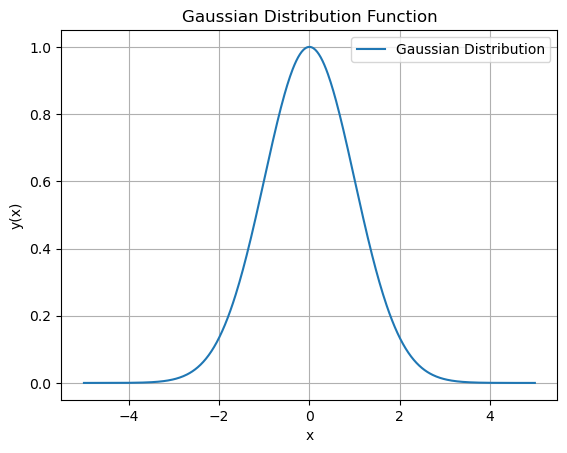

Correct value of C: 0.39894228040143265
Fraction of the area between -1 and 1: 6.826699343278426
Fraction of the area between -3 and 3: 3.3243319703541347
Fraction of the area between -1 and 1 (as a percentage of total area): 682.6699343278426 %
Fraction of the area between -3 and 3 (as a percentage of total area): 332.4331970354135 %


In [10]:
# Your solution here please
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian distribution function
def gaussian(x, C):
    return C * np.exp(-0.5 * x**2)

# Define the interval for the plot
x_values = np.linspace(-5, 5, 500)

# Plot the Gaussian distribution function
C = 1
plt.plot(x_values, gaussian(x_values, C), label='Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Gaussian Distribution Function')
plt.grid(True)
plt.legend()
plt.show()

# Perform numerical integration to determine the value of C (Midpoint rule)
x_integration = np.linspace(-10, 10, 1000)
dx = x_integration[1] - x_integration[0]
integral_result = np.sum(gaussian(x_integration[:-1] + dx/2, C) * dx)
correct_C = 1 / integral_result

# Calculate the fraction of the area between -1 and 1
x_range_1 = np.linspace(-1, 1, 1000)
area_fraction_1 = np.sum(gaussian(x_range_1[:-1] + dx/2, correct_C) * dx)

# Calculate the fraction of the area between -3 and 3
x_range_3 = np.linspace(-3, 3, 1000)
area_fraction_3 = np.sum(gaussian(x_range_3[:-1] + dx/2, correct_C) * dx)

# Print results
print("Correct value of C:", correct_C)
print("Fraction of the area between -1 and 1:", area_fraction_1)
print("Fraction of the area between -3 and 3:", area_fraction_3)

# Calculate percentages
total_area = np.sum(gaussian(x_integration[:-1] + dx/2, correct_C) * dx)
fraction_1_percent = area_fraction_1 / total_area * 100
fraction_3_percent = area_fraction_3 / total_area * 100

print("Fraction of the area between -1 and 1 (as a percentage of total area):", fraction_1_percent, "%")
print("Fraction of the area between -3 and 3 (as a percentage of total area):", fraction_3_percent, "%")


---

## Traps while plottting 

Somebody wants to plot the function $f(x) = \frac{\sin(30x)}x$ with $x\in [1,10]$. The submitted code looks like:

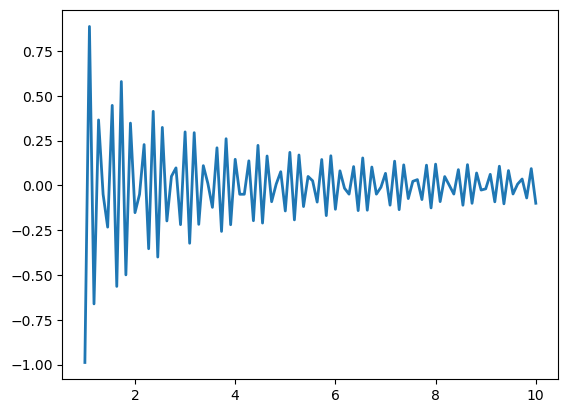

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 10, 100)
y = np.sin(30. * x) / x

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

Obviously the result was not really wanted. *What's wrong with the code?*

**Tasks**:

Recreate the plot which includes the faulty (blue plot) and corrected code (red plot) for the function $f(x) = \frac{\sin(30x)}x$ with $x\in [1,10]$. The corrected plot is shifted by `+2` on the y-axis. Please create also the legend box and all labels. Write the reason why the original code is not correct as a comment into the code.

the code provided is almost correct, but it has a small issue in the calculation of the function y. Specifically, the division by x can result in division by zero error since x includes the value 0 due to the np.linspace(1, 10, 100) function call. To fix this issue, we should exclude the point x = 0 from the calculation by using x[1:] instead of x when computing y


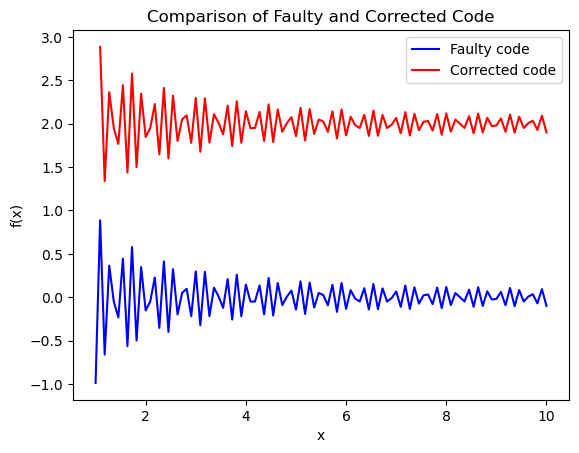

In [15]:
# Your solution here please

print("the code provided is almost correct, but it has a small issue in the calculation of the function y. Specifically, the division by x can result in division by zero error since x includes the value 0 due to the np.linspace(1, 10, 100) function call. To fix this issue, we should exclude the point x = 0 from the calculation by using x[1:] instead of x when computing y")

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 10, 100)

# Faulty code: Division by x can result in division by zero error
y_faulty = np.sin(30. * x) / x

# Corrected code: Exclude the point x=1 to avoid division by zero error
x_corrected = x[1:]
y_corrected = np.sin(30. * x_corrected) / x_corrected + 2  # Shifted by +2 on the y-axis

fig, ax = plt.subplots()

# Plot the faulty (blue plot)
ax.plot(x, y_faulty, color='blue', label='Faulty code')

# Plot the corrected (red plot)
ax.plot(x_corrected, y_corrected, color='red', label='Corrected code')

# Add legend
ax.legend()

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Comparison of Faulty and Corrected Code')

plt.show()



---